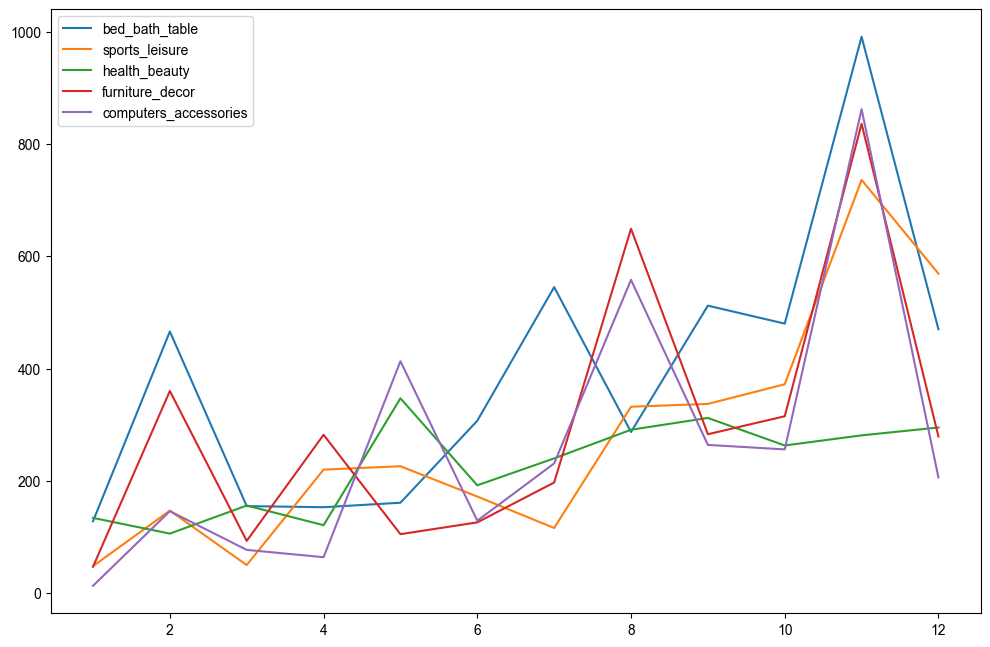

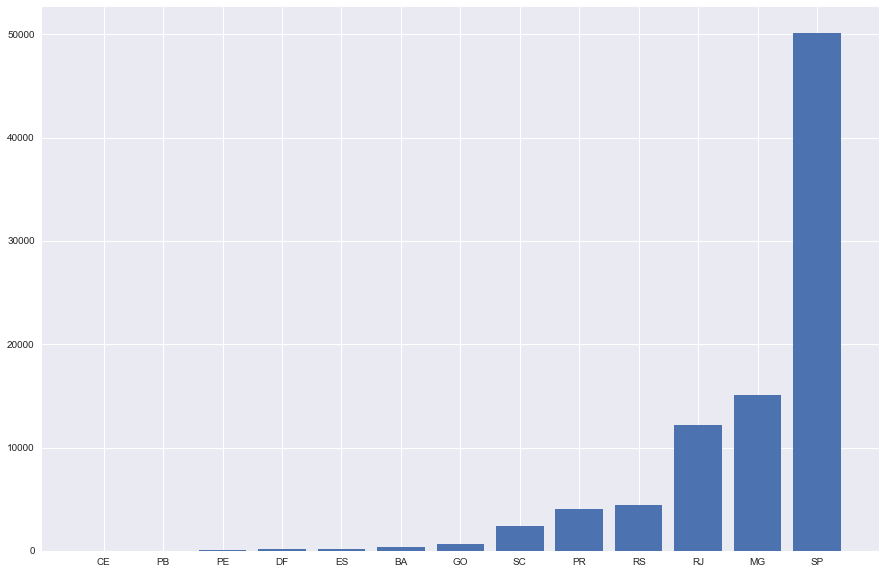

SP    50133
MG    15118
RJ    12140
RS     4448
PR     4064
SC     2366
GO      634
BA      414
ES      178
DF      160
PE      100
PB       25
CE       22
Name: customer_state, dtype: int64


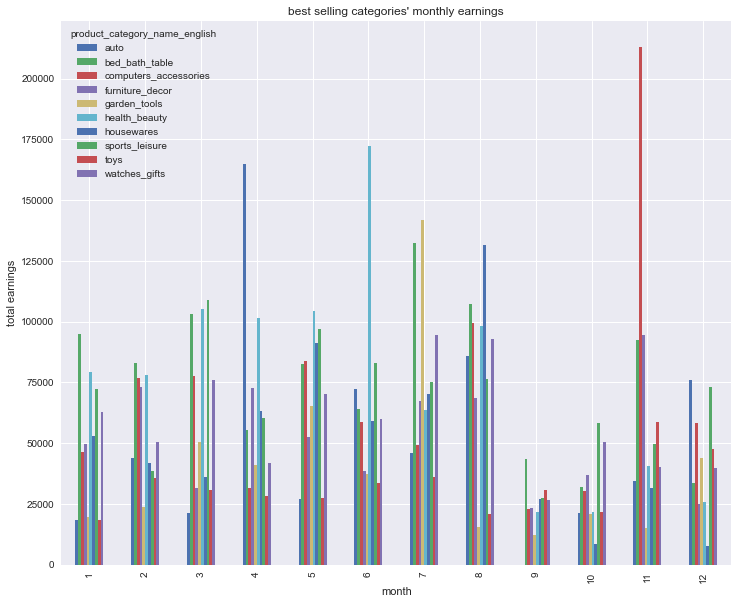

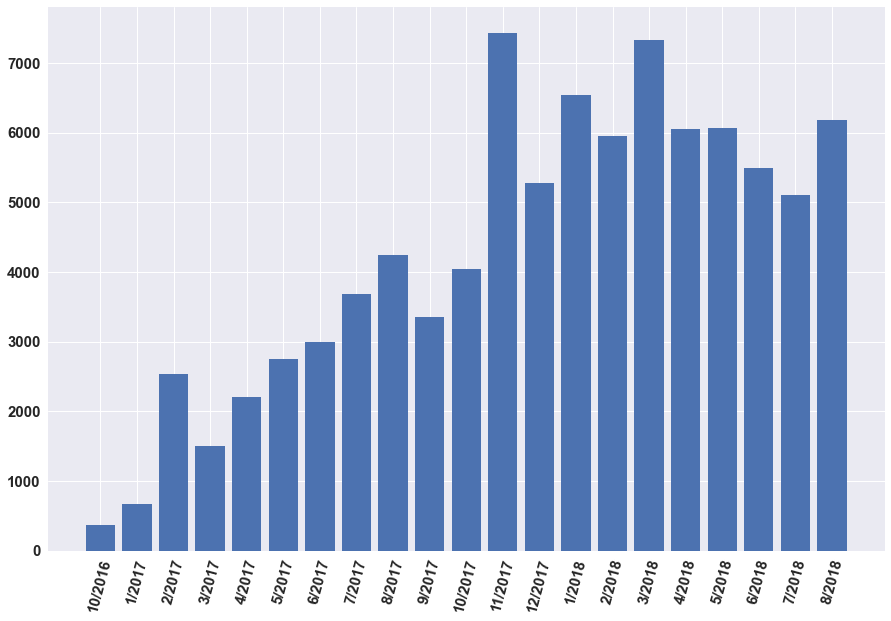

In [1]:
from Jiaxin import *
from Peilun import *
from Yijun import *

import warnings
warnings.filterwarnings('ignore')

# Data Preparation

## Getting the Dataset

Merge all given 10 dataframes on the foreign keys provided into 1 dataframe and convert this dataframe into a pickle file.

We chose to sample 100k rows out of the original 800k because we have relatively strongly correlated attributes in the dataset, so we do not need that much data to decrease the uncertainty in the parameters of our models.


In [2]:
# get_dataset()

## Cleaning the Dataset

Set the allowed percentage of missing data to be 50% in general, unless they are important columns (good predictors for regression). 

In this case, none of the columns with more than 50% missing data is important and we drop all of them.

In [3]:
df = clean_dataset()

## Exploratory Data Analysis

Now that our dataframe is ready, let's explore the dataset with a time series and interactive map.

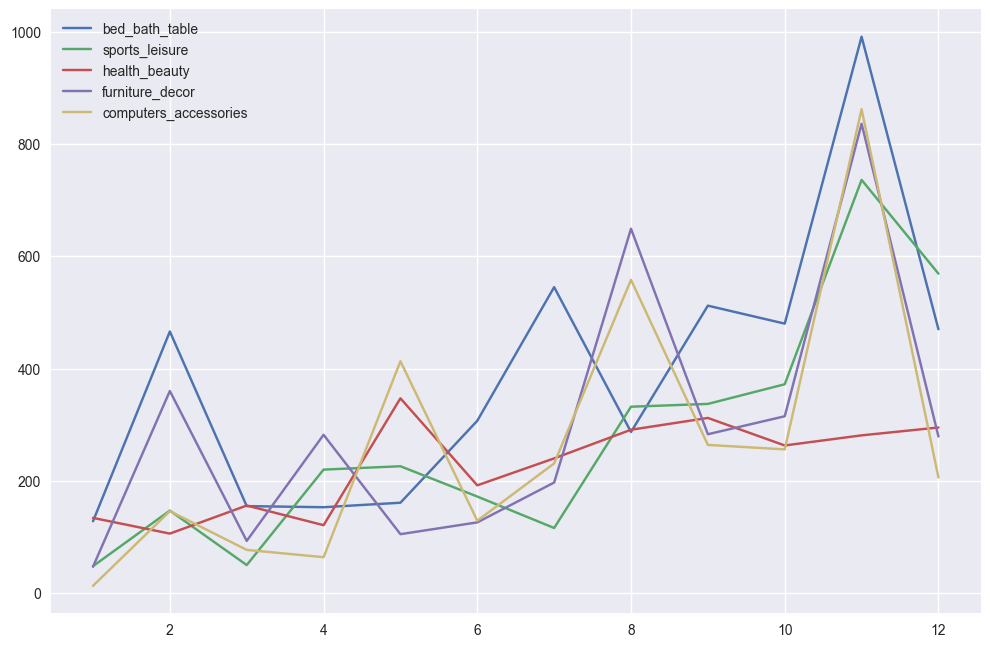

In [4]:
time_series()

We notice that there is a generally increasing trend in sales of all product categories over the year, and the spike is especially significant in November.

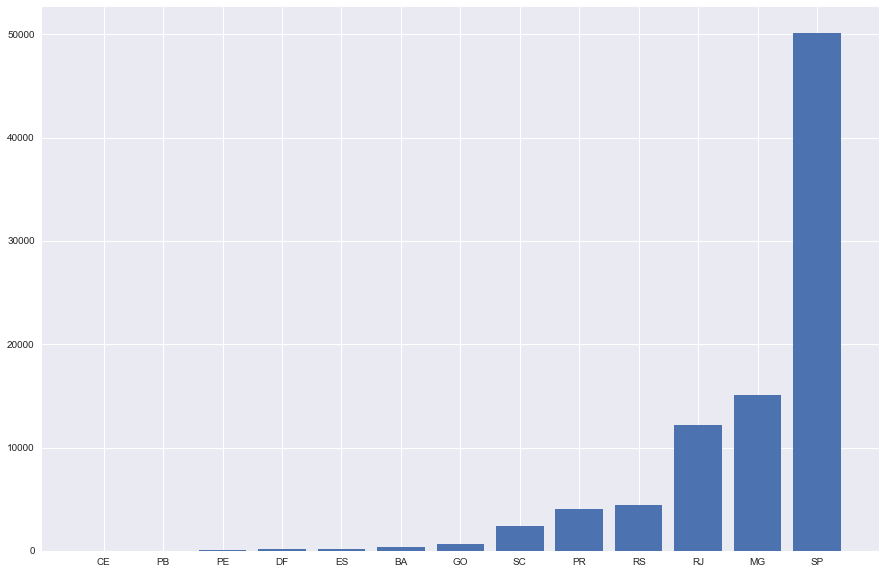

SP    50133
MG    15118
RJ    12140
RS     4448
PR     4064
SC     2366
GO      634
BA      414
ES      178
DF      160
PE      100
PB       25
CE       22
Name: customer_state, dtype: int64


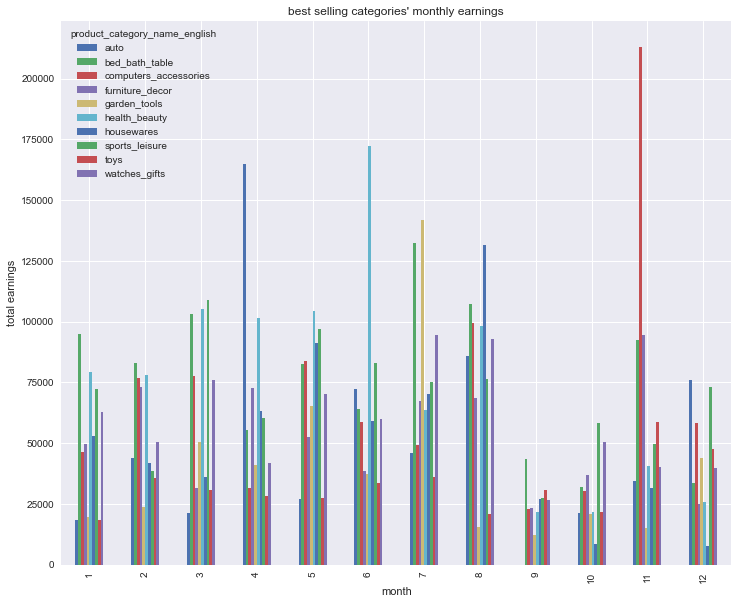

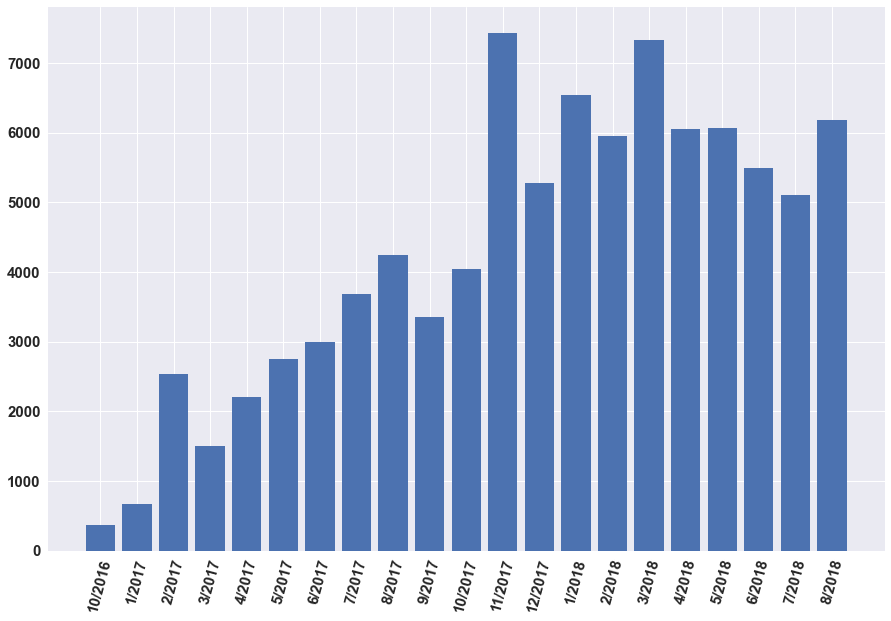

In [5]:
findings()

We order the number of customers by their states, and we find that most orders came from Sao Paulo. From the map, we can very clearly see the distribution of customers, with the radius of each circle corresponding to customer count from that state.

Then we look at the popularity of each category of products over the entire time period, and we notice that the sales of computer accessories is generally consistent, except in December where there was a huge increase.

Finally, the time series shows us that the period of high sales for Olist was Nov 2017 to Jun 2018.

# Problem 1: What are the factors affecting the price of a product?

## ------------------REGRESSION PART LEFT----------------

# Problem 2: Can we predict the category of Customer Lifetime Value (CLV) that customers fall into – low value, mid value, or high value?

Customer Lifetime Value (CLV) is the total monetary value of purchases made by a customer with a business over his entire lifetime - the time period that the customer purchases with the business before moving to your competitors.


*   Low Value: Customers who are less active than others, not very frequent buyers and generate very low/zero/negative revenue.

*   Mid Value: Customers who often use Olist (but not as much as our High Values) and generates moderate revenue.

*    High Value: The group we don’t want to lose. High revenue, frequency and low inactivity.

We will use 3 predictors: recency, frequency and monetary value (or revenue).

## Data Exploration of CLV

In [6]:
CLV_df = CLV_EDA(df)

Time Range: 2016-10-04 TO 2018-08-29
No. of unique customers: 4281
Total sales: 10249070.030000001



## Recency

*Recency refers to the amount of time elapsed since a customer’s last transaction.*

Find the most recent purchase date of each customer and see how many days they are inactive for, then apply k-means clustering to assign customers a recency cluster.


count    89802.000000
mean       237.973364
std        153.178159
min          0.000000
25%        117.000000
50%        218.000000
75%        345.000000
max        693.000000
Name: recency, dtype: float64




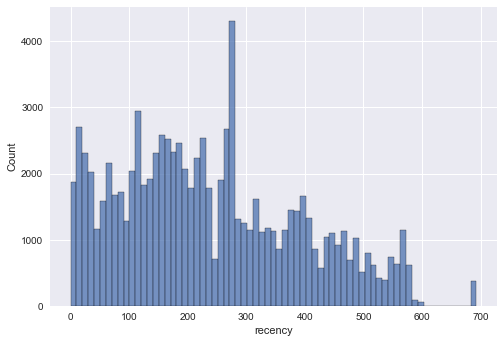

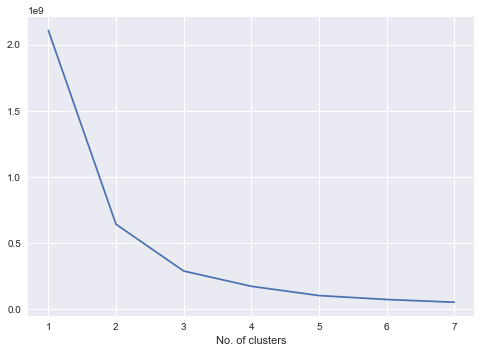

                   count        mean        std    min    25%    50%    75%  \
recency_cluster                                                               
0                23489.0   60.268934  36.801933    0.0   26.0   61.0   93.0   
1                26868.0  181.601906  34.311775  121.0  155.0  180.0  214.0   
2                24471.0  315.723346  46.454685  249.0  275.0  307.0  357.0   
3                14974.0  490.816148  62.483093  404.0  443.0  482.0  541.0   

                   max  
recency_cluster         
0                120.0  
1                248.0  
2                403.0  
3                693.0  




In [7]:
CLV_df = CLV_recency(CLV_df)

We find that the most common customers are those with a recency score of close to 300.

Elbow method tells us that the optimal number of clusters is 4, with cluster 0 being our worst customers (customers who have not bought from Olist for a long time) and cluster 3 being our best customers.

## Frequency

*Frequency refers to how often a customer has bought from the company.* 

Find the total number orders for each customer.


count    89802.000000
mean        60.458743
std         82.151974
min          1.000000
25%         18.000000
50%         30.000000
75%         64.000000
max        492.000000
Name: frequency, dtype: float64




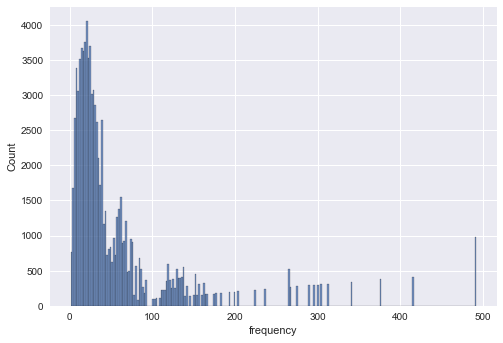

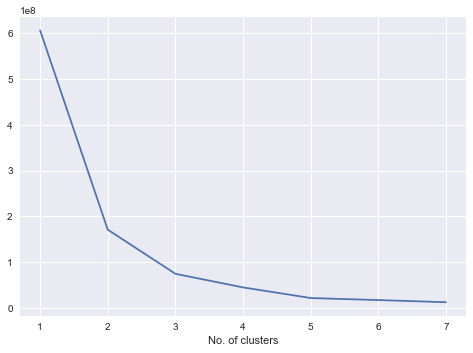

                     count        mean        std    min    25%    50%    75%  \
frequency_cluster                                                               
0                  72690.0   29.539386  18.714952    1.0   15.0   25.0   39.0   
1                  11963.0  127.395720  31.547933   79.0  103.0  128.0  149.0   
2                   3374.0  284.627742  30.823255  223.0  265.0  289.0  305.0   
3                   1775.0  449.424789  49.247664  376.0  415.0  492.0  492.0   

                     max  
frequency_cluster         
0                   77.0  
1                  204.0  
2                  340.0  
3                  492.0  




In [8]:
CLV_df = CLV_frequency(CLV_df)

From the summary statistics, mean is higher than median, so there is a positive right skew ie. most of the frequency values are clustered around the left tail of the distribution.

Elbow method tells us that the optimal number of clusters is 4, with cluster 0 being our worst customers (customers who did not buy from Olist regularly) and cluster 3 being our best customers.

## Revenue

*Revenue refers to how much money a customer has spent with the company.*


count     89802.000000
mean      17874.992941
std       62595.102099
min          21.790000
25%        1432.760000
50%        3414.300000
75%        8600.400000
max      546505.600000
Name: revenue, dtype: float64




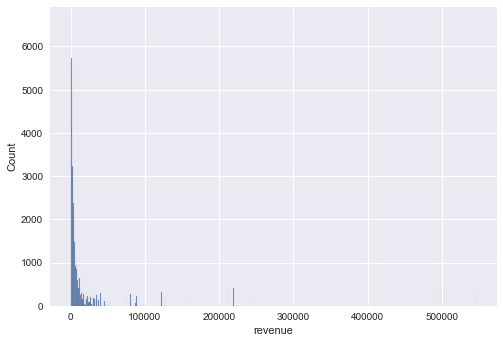

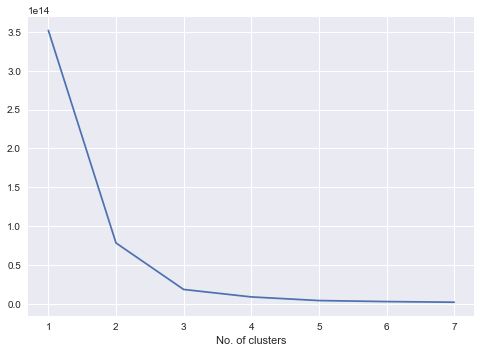

                   count           mean           std        min        25%  \
revenue_cluster                                                               
0                86576.0    7516.190539  12677.921670      21.79    1365.60   
1                 2126.0  186308.375292  43014.430902  122497.44  155054.28   
2                 1100.0  507633.452800  22424.842147  489634.00  489634.00   

                       50%        75%        max  
revenue_cluster                                   
0                  3164.41    7645.84   94754.88  
1                211156.32  219443.70  241312.95  
2                498897.84  498897.84  546505.60  




In [9]:
CLV_df = CLV_revenue(CLV_df)

From the summary statistics, mean is higher than median, so there is a positive right skew ie. most of the revenue values are clustered around the left tail of the distribution.

Elbow method tells us that the optimal number of clusters is 3, with cluster 0 being our worst customers (customers who have spent the least on Olist products) and cluster 3 being our best customers.

## Overall RFM Score

Combine all 3 individual RFM scores into a single predictor, overall_score and sort it.

In [10]:
CLV_df = overall_RFM(CLV_df)

                  recency   frequency        revenue
overall_score                                       
0               60.598931   29.749422    5131.230773
1              166.164297   40.987272    7311.251893
2              286.638678   53.253856    9051.937142
3              447.888626   57.032588    8578.639771
4              419.995975  173.264520   26665.718186
5              329.133439  327.849881  175949.560175
6              280.636364  390.443636  378934.518400
7              258.000000  492.000000  498897.840000


We can see that score 0 is customers with the least value and 6 is customers with the highest value.

## Categorizing Customers

*    0 to 1: low value
*    2 to 3: mid value
*    4 to 6: high value

In [11]:
CLV_df = categorize(CLV_df)

## Plot Clusters

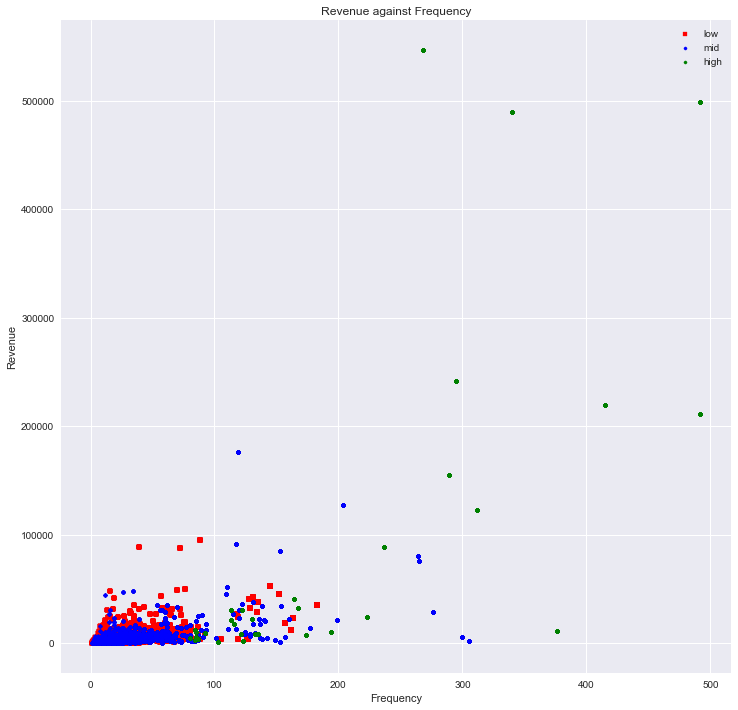

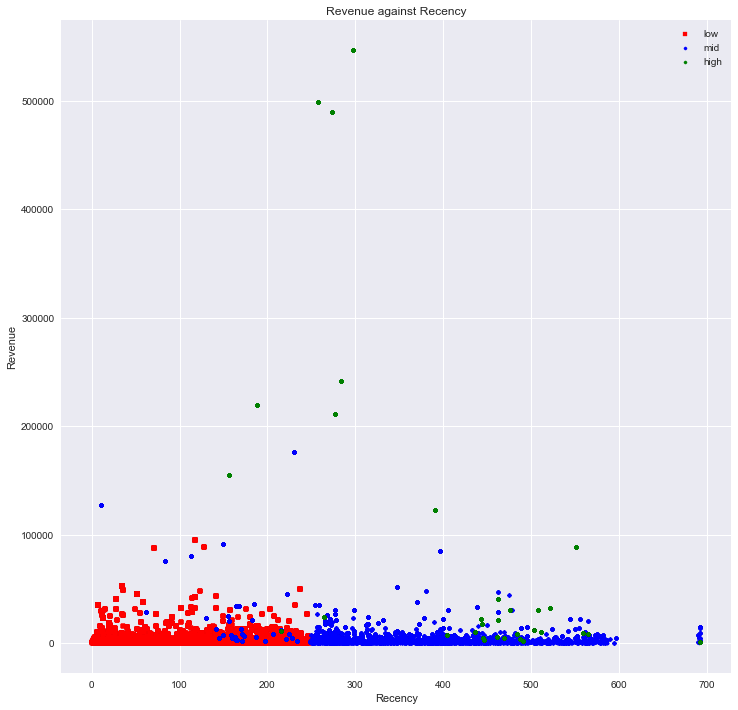

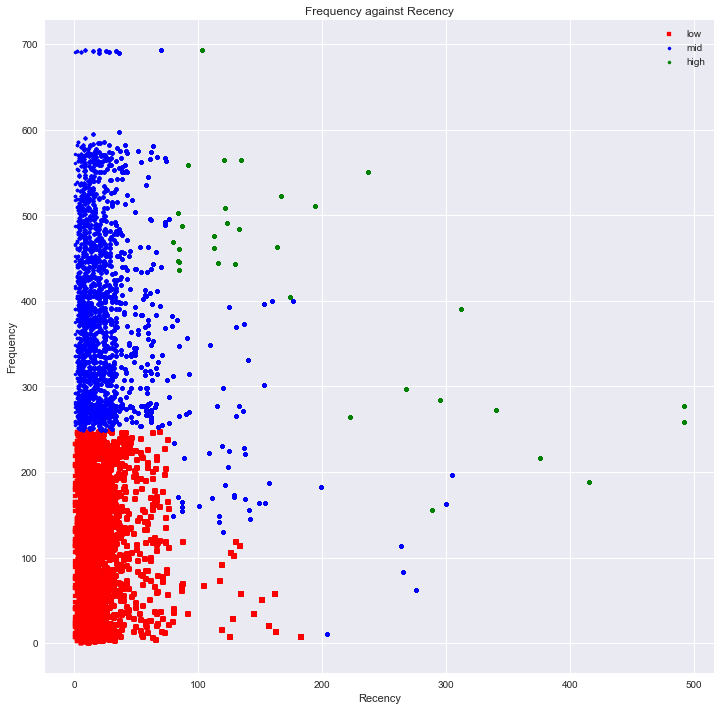

In [12]:
plot_clusters(CLV_df)

We see that the clusters for recency, frequency and revenue are distinct from one another. 

There are not many high value customers, which is expected given the low recency, frequency (most are one time purchases), and revenue, resulting in a low or mid customer lifetime value.

## Splitting Dataset into First 7 Months and Next 14 Months

From our timeseries, we have 21 months of data, from 2016 Oct to 2018 Aug. We take the first 7 months of data and use it to predict CLV for the next 14 months.

There is no cost specified in the dataset, so we take our response CLV to be the same as our predictor revenue.

In [13]:
CLV_7m, CLV_14m = split_months(CLV_df)

## Merging the Original Dataframe with the 14 Months Dataframe

In [14]:
CLV_merged = get_CLV_merged(CLV_14m, CLV_df)

               count          mean           std          min           25%  \
CLV_cluster                                                                   
0            86014.0  5.443014e+05  1.354930e+06         0.00  1.786848e+04   
1             1486.0  2.913786e+07  1.032204e+07  20039406.00  2.099000e+07   
2             1202.0  9.143702e+07  1.281734e+07  71187320.25  9.106914e+07   

                      50%           75%           max  
CLV_cluster                                            
0            8.057412e+04  3.499973e+05  1.301400e+07  
1            2.131931e+07  3.821920e+07  4.481069e+07  
2            9.106914e+07  1.038889e+08  1.038889e+08  




We note that the dataset is imbalanced since 97% of the customers belong to cluster 0 (low value customers).

## Correlation

Before building the model, let's look at the correlation between our predictor, overall RFM score, and response, CLV_cluster. Let's also do the same for CLV (the absolute number).

CLV_cluster          1.000000
m14_Revenue          0.962688
revenue              0.909255
revenue_cluster      0.850241
frequency            0.688771
frequency_cluster    0.635995
overall_score        0.417026
payment_value        0.302010
recency_cluster      0.021482
price                0.021172
recency              0.013635
Name: CLV_cluster, dtype: float64


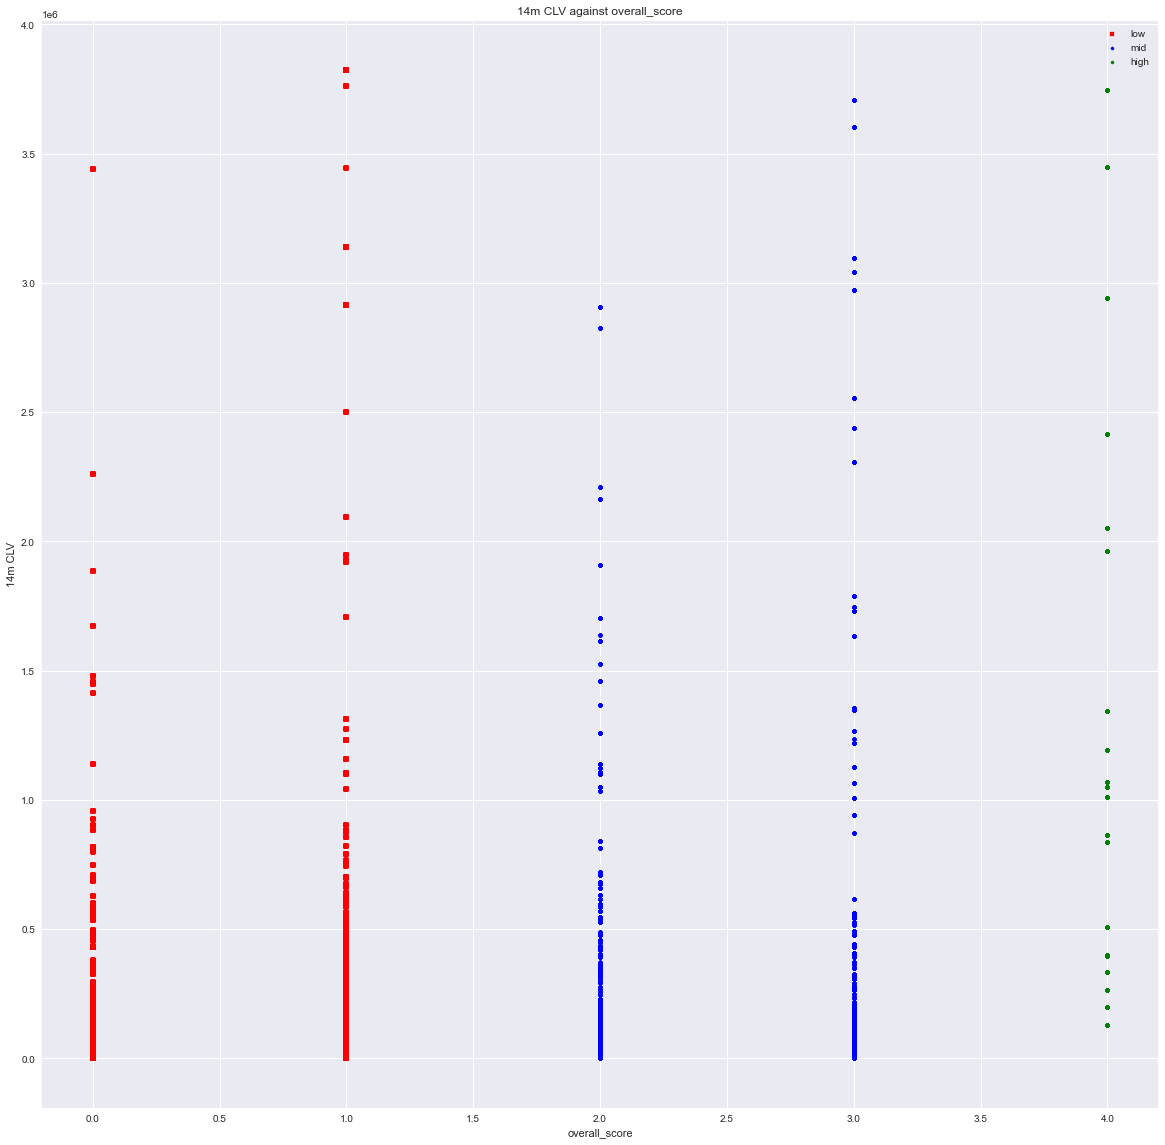

In [15]:
correlation_plot(CLV_merged)
print_correlation(CLV_merged)

From the correlation numbers, we see that revenue, frequency and overall_score will be helpful in predicting CLV_cluster.

The scatter plot also makes it quite clear that there is a positive correlation between overall_score in particular and CLV: the higher the RFM score, the higher the CLV.

## Converting Categorical Variable "category" to Numeric

In order for us to use XGBoost to predict CLV based on the "category" column, we need to convert the categorical values to numeric first, using one hot encoding.


In [16]:
CLV_merged = one_hot_encoding(CLV_merged)

## Classification

[21:34:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score is: 0.829


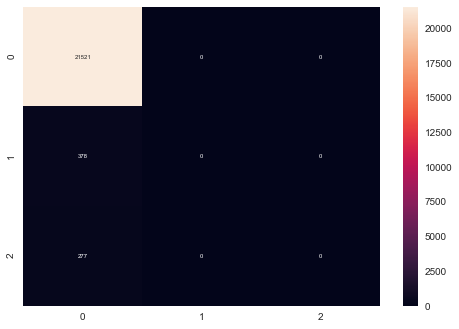

In [17]:
XGB_classification(CLV_merged)

Keeping in mind that our data is so imbalanced (97% of all customers are in the low value cluster), our predictor almost always predicts any given customer as a low value customer and this leads to high accuracy, which tells us nothing about how well our model is doing.

This means that using accuracy as a metric is not ideal, and we use f1 score instead, which takes into account this class imbalance. We consider recall to be twice as important as precision in our model - it is worse to misclassify a mid/high value customer to be low value and miss out on engagement, than to misclassify a low value customer to be mid/high value. We find that we get a pretty good f1 score of 0.830.

# Insights

## ------------------REGRESSION PART LEFT----------------

Now that we have the segmentation, we can start taking actions. The goals for each group are as follows:

*   Low Value: increase frequency
*   Mid Value: increase frequency + improve retention 
*   High Value: improve retention